In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install spatialdata spatialdata_plot spatialdata_io

In [ ]:
import numpy as np

import spatialdata as sd
import spatialdata_plot
from pathlib import Path
from spatialdata_io import xenium

import matplotlib.pyplot as plt
import seaborn as sns

##Loading the dataset

In [4]:
path_read = "/content/drive/Othercomputers/My Laptop/Shared/Thesis/Data/Xenium_hPancreas_Cancer/Xenium_V1_hPancreas_Cancer_Add_on_FFPE_outs"
path_write = "/content/drive/MyDrive/Thesis/Projects/Steamboat_X/Xenium/data.zarr"
he_path = "/content/drive/Othercomputers/My Laptop/Shared/Thesis/Data/Xenium_hPancreas_Cancer/Xenium_V1_hPancreas_Cancer_Add_on_FFPE_outs/Xenium_V1_hPancreas_Cancer_Add_on_FFPE_he_image.ome.tif"
alignment_file = "/content/drive/Othercomputers/My Laptop/Shared/Thesis/Data/Xenium_hPancreas_Cancer/Xenium_V1_hPancreas_Cancer_Add_on_FFPE_outs/Xenium_V1_hPancreas_Cancer_Add_on_FFPE_he_imagealignment.csv"

In [ ]:
#sdata = xenium(path_read, aligned_images=True)

In [ ]:
#sdata

In [ ]:
#sdata.write(path_write, overwrite=True)

In [5]:
sdata = sd.read_zarr(path_write)
sdata

/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/usr/local/lib/python3.12/dist-packages/zarr/creation.py:610: Use

SpatialData object, with associated Zarr store: /content/drive/MyDrive/Thesis/Projects/Steamboat_X/Xenium/data.zarr
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 71883, 20562), (3, 35941, 10281), (3, 17970, 5140), (3, 8985, 2570), (3, 4492, 1285)
│     ├── 'morphology_focus': DataTree[cyx] (1, 13752, 48274), (1, 6876, 24137), (1, 3438, 12068), (1, 1719, 6034), (1, 859, 3017)
│     └── 'morphology_mip': DataTree[cyx] (1, 13752, 48274), (1, 6876, 24137), (1, 3438, 12068), (1, 1719, 6034), (1, 859, 3017)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (13752, 48274), (6876, 24137), (3438, 12068), (1719, 6034), (859, 3017)
│     └── 'nucleus_labels': DataTree[yx] (13752, 48274), (6876, 24137), (3438, 12068), (1719, 6034), (859, 3017)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (190965, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (190965, 2) (2D shapes)
│     └── 'nuc

##Exploring the dataset

In [ ]:
### to see the available functions
dir(sdata)
help(sdata)

In [6]:
adata = sdata.tables['table']
adata.obs

,cell_id,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,region,cell_labels
0,aaaanbjb-1,143,0,0,0,0,143,172.225944,8.037813,cell_circles,1
1,aaabbnlb-1,112,0,0,0,0,112,334.517512,17.294844,cell_circles,2
2,aaabdean-1,81,0,0,0,0,81,180.263757,20.681563,cell_circles,3
3,aaabkppc-1,30,0,0,0,0,30,43.891877,6.637969,cell_circles,4
4,aaablfle-1,92,0,0,0,0,92,140.255318,27.093751,cell_circles,5
...,...,...,...,...,...,...,...,...,...,...,...
190960,oipjjmli-1,133,0,0,0,0,133,111.219848,24.429532,cell_circles,190961
190961,oipkfocl-1,69,0,0,0,0,69,111.039223,16.888438,cell_circles,190962
190962,oipkjaho-1,124,0,0,0,0,124,187.579069,23.120001,cell_circles,190963
190963,oipkmkcd-1,242,0,0,0,0,242,236.167196,22.262032,cell_circles,190964


---

**Column explanations**

---





1.   **cell_id:**
A unique identifier for each segmented cell in the dataset.

2.   **transcript_counts:**
The total number of valid gene transcripts detected and assigned to this cell.

3.   **control_probe_counts:**
The number of transcripts detected from control probes.

    
> These probes are not real genes; they are synthetic controls used to check for background signal, assay performance, or nonspecific binding.



4.  **control_codeword_counts:**
Counts of control “codewords” (signal patterns that don't correspond to real genes).



> This is used for calibration and error checking of the Xenium decoding pipeline.


5.  **unassigned_codeword_counts:**
Number of detected fluorescent signals (“codewords”) that could not be matched to any gene, control probe, or control codeword.

>Typically background noise, optical artifacts, or imperfect probe binding.

6.  **total_counts:**
The sum of all transcript-like signals detected in the cell:
transcript_counts + control_probe_counts + control_codeword_counts + unassigned_codeword_counts + deprecated_codeword_counts.

7.  **cell_area:**
The area (in square microns) of the segmented cell, based on the Xenium cell segmentation mask.

8.  **nucleus_area**
The area (in square microns) of the nucleus inside that cell, also from segmentation.

9.  **region:**
Which tissue region the cell belongs to, if regions were annotated (e.g., tumor vs stroma, cortex vs hippocampus).

10.  **cell_labels:**
The assigned cell type label (if clustering or annotation has been performed).

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

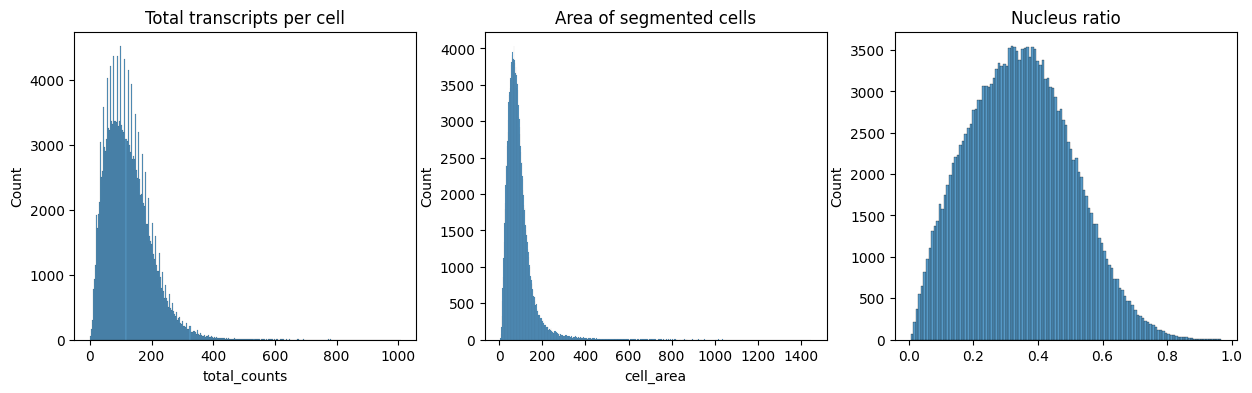

In [7]:
###Histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)


axs[1].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[1],
)

axs[2].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

## Images (spatial data library)

The datasets contains 2 large microscopy image, represented as a multiscale, chunked image; the first one, ***he_image*** is the **H&E image** of the tissue, stained post-Xenium measurement, and the ***morphology_focus*** image which consists of the **image of the tissue** used for the Xenium experiment.


INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


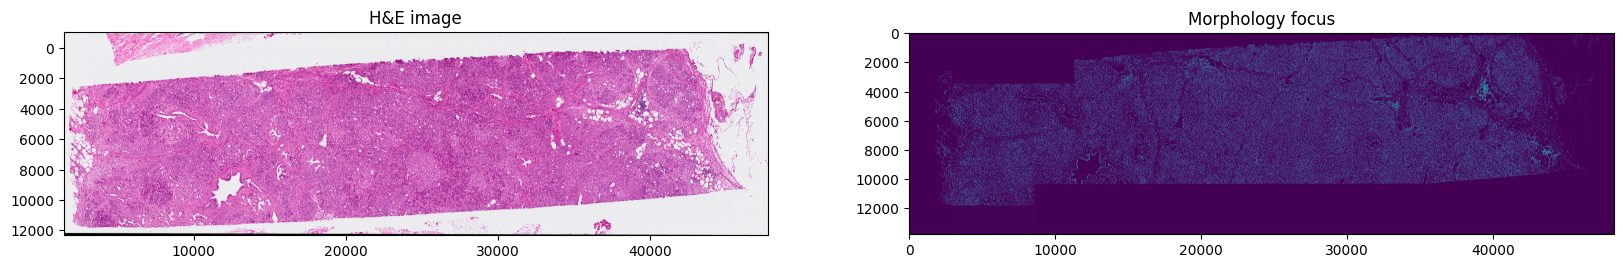

In [8]:
### Ploting the morphology images inside the dataset
axes = plt.subplots(1, 2, figsize=(20, 12))[1].flatten()
sdata.pl.render_images("he_image").pl.show(ax=axes[0], title="H&E image", colorbar=False)
sdata.pl.render_images("morphology_focus").pl.show(ax=axes[1], title="Morphology focus", colorbar=False)
#sdata.pl.render_images("morphology_mip").pl.show(ax=axes[1], title="Morphology mip", colorbar=False)

Furthermore, it also contains label images, that are the segmentation masks of cells or nuclei (cell_labels and nucleus_labels respectively).

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


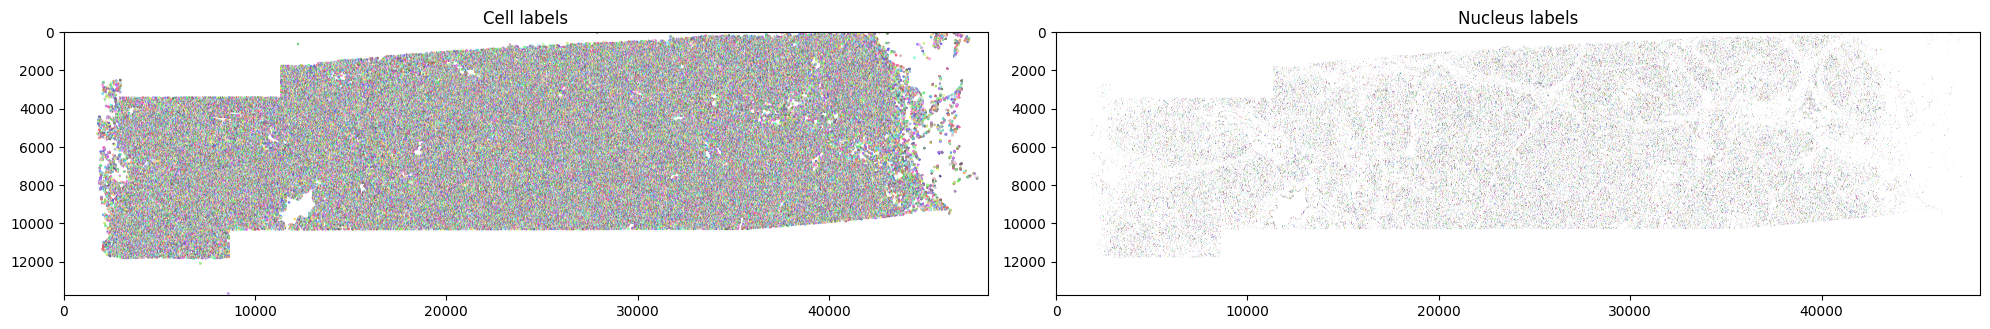

In [9]:
axs = plt.subplots(1, 2, figsize=(20, 12))[1].flatten()

#cell label image
sdata.pl.render_labels("cell_labels").pl.show(ax=axs[0], title="Cell labels", colorbar=False)


#nucleus label image
sdata.pl.render_labels("nucleus_labels").pl.show(ax=axs[1], title="Nucleus labels", colorbar=False)

plt.tight_layout()
plt.show()

## Question: How does "sdata.pl" deal with the matrix and the alignment?

## Images (direct)

In [ ]:
!pip install aicsimageio

In [ ]:
from aicsimageio import AICSImage

In [ ]:
he_path = "/content/drive/Othercomputers/My Laptop/Shared/Thesis/Data/Xenium_hPancreas_Cancer/Xenium_V1_hPancreas_Cancer_Add_on_FFPE_he_image.ome.tif"
img = AICSImage(he_path)
he_image = img.data  # gives you a NumPy array
print(he_image.shape)

(1, 1, 1, 71883, 20562, 3)


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# H&E image
axs[0].imshow(np.rot90(he_image[0, 0, 0, :, :, :]))
axs[0].set_title("H&E image")
axs[0].axis('off')

# Morphology focus (scale3)
morph_image = sdata.images['morphology_focus']["scale3"].image.data.compute()[0, :, :]
axs[1].imshow(morph_image)
axs[1].set_title("Morphology Focus")
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

#cell label image
cell_label = sdata.labels["cell_labels"]['scale3'].image.data.compute()
axs[0].imshow(cell_label)
axs[0].set_title("cell_labels")
axs[0].axis('off')


#nucleus label image
nucleus_label = sdata.labels["nucleus_labels"]['scale3'].image.data.compute()
axs[1].imshow(nucleus_label)
axs[1].set_title("nucleus_labels")
axs[1].axis('off')

plt.tight_layout()
plt.show()